In [7]:
from MCTS import *
from algorithms import *
from simulator import *

In [8]:
lava_maze = """
-----------------
|..L....L....L..|
|..L..LLL..L.LL.|
|..L..L.......L.|
|.....L.....L...|
|..L....L....L..|
|..LLL..L.LLLL..|
|..L.L..L..L....|
|..L....L....L..|
|.....L.....L...|
-----------------
"""

simple_room = """
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............

"""

In [9]:
map = make_map(map_str=lava_maze, n_apples=5, seed=18)
print(map)

Placing 5 apples between (0, 1) and (17, 10)

MAZE: "mylevel", ' '
FLAGS:hardfloor
INIT_MAP: solidfill,' '
GEOMETRY:center,center
MAP
-----------------
|..L....L....L..|
|..L..LLL..L.LL.|
|..L..L.......L.|
|.....L.....L...|
|..L....L....L..|
|..LLL..L.LLLL..|
|..L.L..L..L....|
|..L....L....L..|
|.....L.....L...|
-----------------
ENDMAP
REGION:(0,0,17,11),lit,"ordinary"
OBJECT:('%',"apple"),(5, 2)
OBJECT:('%',"apple"),(14, 6)
OBJECT:('%',"apple"),(7, 4)
OBJECT:('%',"apple"),(15, 8)
OBJECT:('%',"apple"),(5, 8)
STAIR:(15, 9),down
WALLIFY



In [10]:
env = create_env(map, apple_reward=0.75, penalty_time=-0.1)
env.reset()
env.render()


Be careful!  New moon tonight.                                                  
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              -----------------                                 
                              |..}....}....}..|                                 
                              |..}.%}}}..}.}}.|                                 
                              |..}..}.......}.|                                 
                              |.....}%....}...|                                 
                              |..}....}.@..}..|                                 
                           

ACTION_TAKEN: PICKUP
What do you want to eat? [f or ?*] 
ACTION_TAKEN: EAT f
Core dumped.


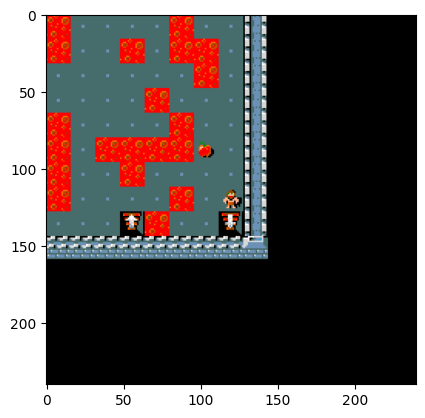

Reward: 0.050000000000000044
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 0.9500000000000001
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 0.9500000000000001
Simulation completed in 0.91 seconds.


0.9500000000000001

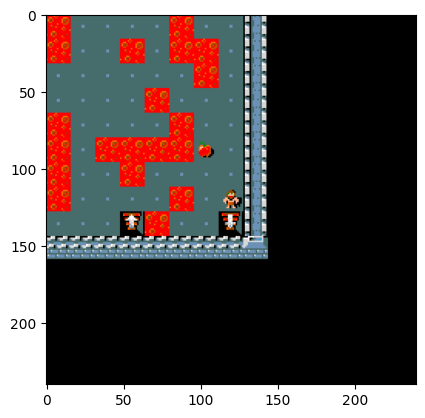

In [11]:
# A star with bonus to tiles that have apples nearby
simulate_with_heuristic(env, a_star_apple, h=manhattan_distance, apple_bonus=3)

ACTION_TAKEN: PICKUP
What do you want to eat? [j or ?*] 
ACTION_TAKEN: EAT j
Core dumped.


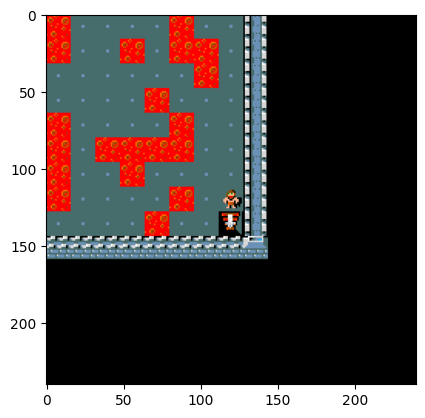

Reward: 0.6500000000000004
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 1.5500000000000003
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 1.5500000000000003
Simulation completed in 2.25 seconds.


1.5500000000000003

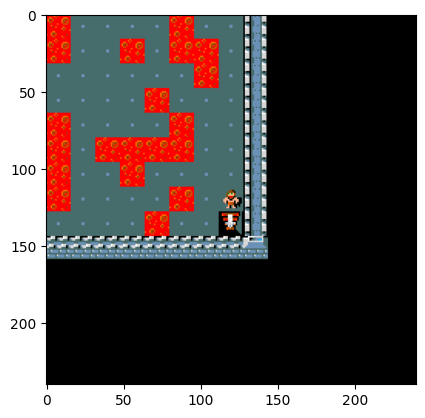

In [12]:
# A* with modified heuristic that considers the distance to apples then stairs
simulate_with_heuristic(env, a_star_collect_apples, weight=1)

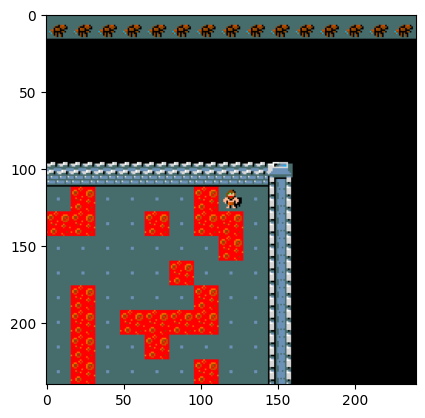

Reward: -2.5500000000000007
Stairs were not reached.
Episode finished: {'end_status': <StepStatus.RUNNING: 0>, 'is_ascended': False}
Reward: -2.5500000000000007
Simulation completed in 7.14 seconds.


-2.5500000000000007

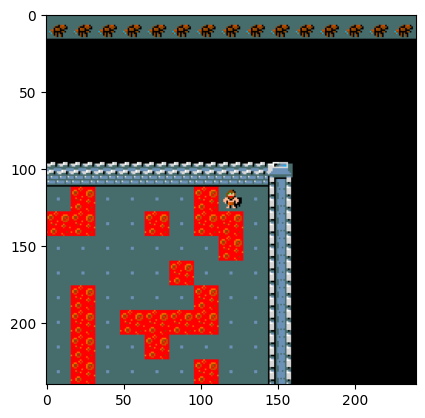

In [13]:
# Monte Carlo with Random
simulate_with_heuristic(
    env, mcts, iterations=5000
)

ACTION_TAKEN: PICKUP
What do you want to eat? [h or ?*] 
ACTION_TAKEN: EAT h
Core dumped.


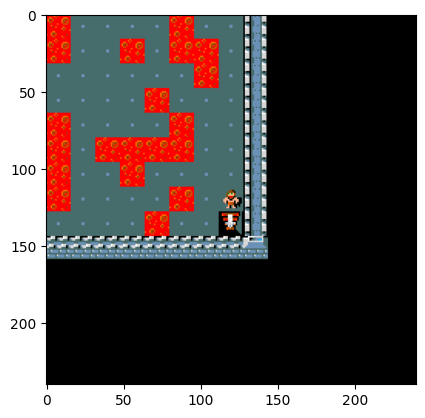

Reward: 0.15000000000000024
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 1.0500000000000003
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 1.0500000000000003
Simulation completed in 2.62 seconds.


1.0500000000000003

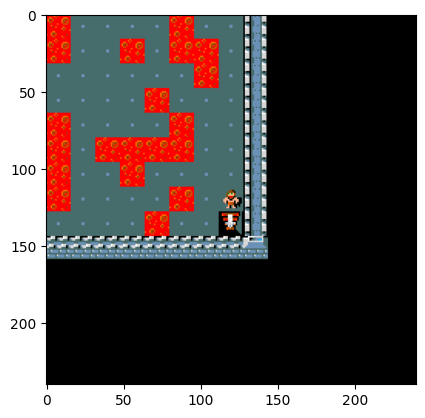

In [14]:
# Beam Search
simulate_with_heuristic(
    env, beam_search_apple, apple_reward=7.5,
    beam_width=5
)

ACTION_TAKEN: PICKUP
What do you want to eat? [g or ?*] 
ACTION_TAKEN: EAT g
Core dumped.


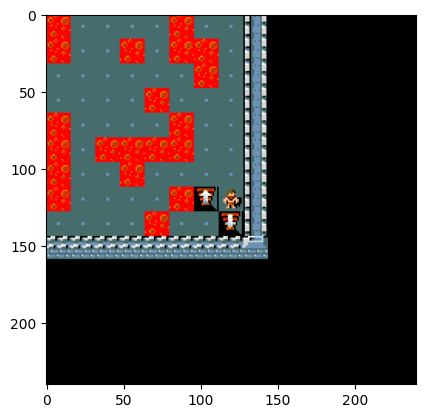

Reward: 0.8
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 1.7000000000000002
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 1.7000000000000002
Simulation completed in 0.85 seconds.


1.7000000000000002

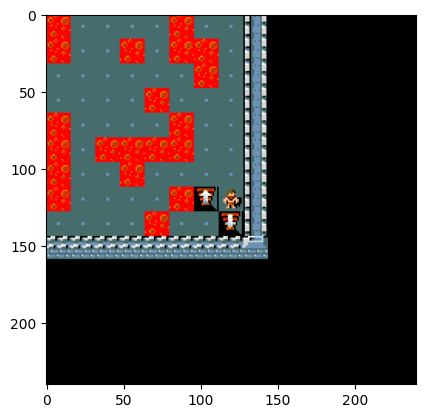

In [15]:
# Potential fields
simulate_with_heuristic(
    env, potential_field_path
)

ACTION_TAKEN: PICKUP
What do you want to eat? [g or ?*] 
ACTION_TAKEN: EAT g
Blecch!  Rotten food!  You feel rather light headed.


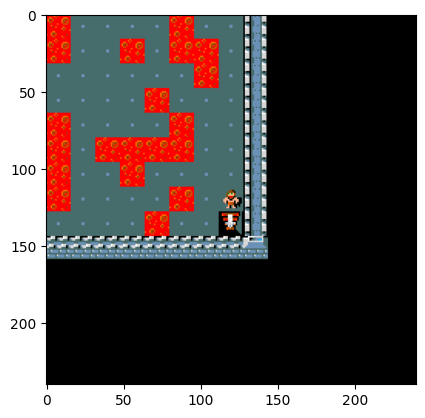

Reward: -0.7500000000000008
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 0.14999999999999925
Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 0.14999999999999925
Simulation completed in 5.98 seconds.


0.14999999999999925

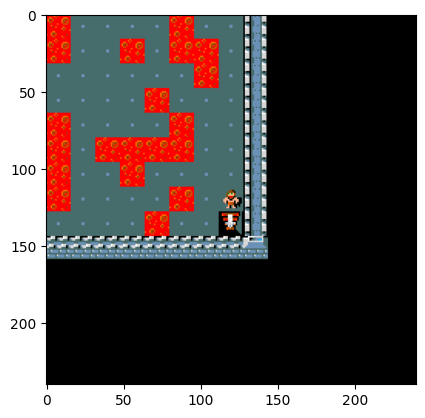

In [16]:
simulate_with_heuristic(
    env, greedy_best_first_search
)

# Online Pathfinding Algorithms

In [17]:
from algorithms_online import *
from simulator import *

lava_maze = """
-----------------
|..L....L....L..|
|..L..LLL..L.LL.|
|..L..L.......L.|
|.....L.....L...|
|..L....L....L..|
|..LLL..L.LLLL..|
|..L.L..L..L....|
|..L....L....L..|
|.....L.....L...|
-----------------
"""

simple_room = """
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
"""

simple_maze = """
||||||||||||||||||||||
|....................|
|..|||||.....|..|....|
|..|   |...||||||||..|
|..||| |........|....|
|.....| |||||||.|||..|
|.....|       |.|....|
|.....|       |......|
|||||||  ||||||......|
         |.......|...|
         |.......|||.|
         |...........|
         |||||||||||||
"""

In [18]:
env = create_env(make_map(lava_maze, 5), apple_reward=0.75, penalty_time=-0.1)

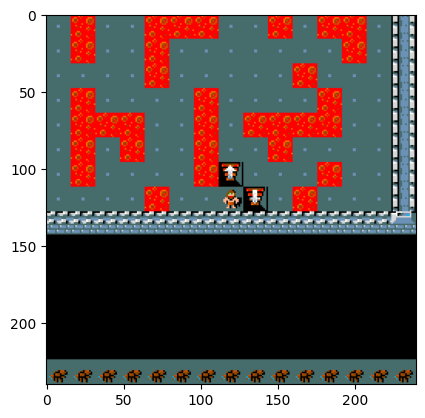

Episode finished: {'end_status': <StepStatus.TASK_SUCCESSFUL: 2>, 'is_ascended': False}
Reward: 0.55
Simulation completed in 7.70 seconds.
Saving video to ./lava_star/1751039420.5114174.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:
simulate_online(env, a_star_online, save_dir="./lava_star/", gif_name=str(time.time()))

In [ ]:
env = create_env("simple_maze.des", apple_reward=1)

In [ ]:
simulate_online(env, planner_online, wait_time=0.5, clear_outputs=True, cropped=True, save_dir="./simple_maze_explore/",
                gif_name='mcts_' + str(time.time()), planner_func=mcts,
                iterations=10000)

In [ ]:
env = create_env(make_map(simple_maze, 5, premapped=False, start=(3, 6), stairs=(10, 10)), apple_reward=0.75,
                 penalty_time=-0.1)
simulate_online(env, planner_online, wait_time=0.5, clear_outputs=True, cropped=True,
                planner_func=beam_search_apple, beam_width=5, apple_reward=7.5)

In [ ]:
complex_maze = """
               |||||||||||||||||
 ||||||||||    |...............|
 |........|    |............|..|
 |........|    |............|..|
 ||||||...|    |..|||||..||||..|
      |...|    |..|   |........|
      |...|    |..|   |........|  ||||||
|||||||...||||||..|   |.....||||  |....|
|.................|   |.....|     |....|
|...||||....|..|..|   |.....|||||||....|
|....| |..|||||||.|   |................|
|....| |.......|..|   |................|
|....| |||||||.||.|   |....||||||||....|
|....|       |.|..|   |....|      |....|
|....|       |....|   |....||||   |....|
||||||  ||||||....|   |.......|   ||||||
        |......|..|   |.......|
        |......||.|   |.......|
        |.........|   |||||||||
        |||||||||||
"""
env = create_env(make_map(complex_maze, 5, premapped=False, start=(3, 6), stairs=(37, 13)), apple_reward=5,
                 penalty_time=-0.1)


In [ ]:
simulate_online(env, planner_online, wait_time=0.5, clear_outputs=True, cropped=True,
                save_dir="./complex_maze_explore/",
                gif_name='beam_' + str(time.time()),
                planner_func=beam_search_apple, beam_width=5, apple_reward=7.5)